In [ ]:
#Heart Disease Prediction  - (PROJECT III) - DATA ANALYSIS AND MACHINE LEARNING INTERNSHIP PROGRAM
SUBMITTED BY: Sourabh Tagad
SUBMITTED TO: Anu maam 
DATE- AUG 2025

In [ ]:
Heart Disease Prediction — Step 1: Import libraries & load dataset
File expected: heartdisease_u5z_lx9fv.csv (update FILE_PATH if needed)

This script:
1) Loads the CSV safely
2) Prints basic structure (shape, dtypes, sample rows)
3) Checks target distribution & class imbalance
4) Reports missing values & duplicate rows
5) Verifies expected columns from the data dictionary
Next steps (in later files): EDA, feature engineering, model experiments


In [2]:

from __future__ import annotations
import os
from typing import List
import pandas as pd
import numpy as np

# =====================
# Config
# =====================
FILE_PATH = "heartdisease_u5z_lx9fv.csv"
TARGET_COL = "HeartDiseaseorAttack"
EXPECTED_COLS: List[str] = [
    "HeartDiseaseorAttack",
    "HighBP",
    "HighChol",
    "BMI",
    "Smoker",
    "Diabetes",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "MentHlth",
    "PhysHlth",
    "Sex",
    "Age",
    "Education",
    "Income",
]

# =====================
# Helpers
# =====================

def safe_read_csv(path: str) -> pd.DataFrame:
    """Read CSV trying a couple of encodings; raise a clear error otherwise."""
    tried = []
    for enc in ("utf-8", "utf-8-sig", "latin1"):
        try:
            df = pd.read_csv(path, encoding=enc)
            return df
        except Exception as e:
            tried.append(f"{enc}: {e}")
    raise FileNotFoundError(
        "\n".join([
            f"Could not read CSV at: {os.path.abspath(path)}",
            "Tried encodings:",
            *tried,
            "\nTips: Ensure the file path is correct or update FILE_PATH."
        ])
    )


def check_expected_columns(df: pd.DataFrame, expected: List[str]) -> None:
    print("\n=== Column check vs Data Dictionary ===")
    actual = list(df.columns)
    missing = [c for c in expected if c not in actual]
    extras = [c for c in actual if c not in expected]
    if missing:
        print("Missing columns:", missing)
    else:
        print("No missing columns from expected list.")
    if extras:
        print("Extra columns present (not in dictionary):", extras)
    else:
        print("No extra columns.")


def summarize_dataframe(df: pd.DataFrame, target: str) -> None:
    print("\n=== Basic Info ===")
    print(f"Shape: {df.shape}")
    print("\nDtypes:\n", df.dtypes)

    print("\n=== Sample Rows (head) ===")
    print(df.head(10))

    print("\n=== Missing Values (count and %) ===")
    na_count = df.isna().sum()
    na_pct = (na_count / len(df) * 100).round(2)
    miss_tbl = pd.DataFrame({"missing_count": na_count, "missing_%": na_pct}).sort_values("missing_%", ascending=False)
    print(miss_tbl)

    print("\n=== Duplicate Rows ===")
    dup_count = df.duplicated().sum()
    print(f"Duplicate rows: {dup_count}")

    if target in df.columns:
        print("\n=== Target Distribution ===")
        vc = df[target].value_counts(dropna=False)
        pct = (vc / vc.sum() * 100).round(2)
        dist = pd.DataFrame({"count": vc, "percent": pct})
        print(dist)

        # Imbalance flag
        if len(vc) >= 2:
            min_pct = pct.min()
            max_pct = pct.max()
            print(f"\nClass balance check → min class: {min_pct}%, max class: {max_pct}%")
            if min_pct < 20:
                print("WARNING: Potential class imbalance detected (<20% for a class). Consider resampling or class weights.")
    else:
        print(f"WARNING: Target column '{target}' not found. Update TARGET_COL if needed.")


# =====================
# Main
# =====================
if __name__ == "__main__":
    print("Loading dataset...\n")
    df = safe_read_csv(FILE_PATH)
    print("Loaded successfully!\n")

    check_expected_columns(df, EXPECTED_COLS)
    summarize_dataframe(df, TARGET_COL)

    # Save a tiny preview for quick sharing if needed
    try:
        preview_path = "dataset_preview_head10.csv"
        df.head(10).to_csv(preview_path, index=False)
        print(f"\nSaved a 10-row preview to: {os.path.abspath(preview_path)}")
    except Exception as e:
        print(f"Could not save preview: {e}")


Loading dataset...

Loaded successfully!


=== Column check vs Data Dictionary ===
No missing columns from expected list.
Extra columns present (not in dictionary): ['PhysActivity']

=== Basic Info ===
Shape: (253680, 16)

Dtypes:
 HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
BMI                     float64
Smoker                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
MentHlth                float64
PhysHlth                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

=== Sample Rows (head) ===
   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2      

In [ ]:
Heart Disease Prediction — Step 2: Exploratory Data Analysis (EDA)

This script:
1) Drops duplicate rows
2) Performs Univariate analysis (distributions of features)
3) Performs Multivariate analysis (correlation heatmap, target relationships)
4) Saves plots for visual inspection

Next step: Feature engineering & preprocessing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# Config
# =====================
FILE_PATH = "heartdisease_u5z_lx9fv.csv"
TARGET_COL = "HeartDiseaseorAttack"

# =====================
# Load + Clean
# =====================
df = pd.read_csv(FILE_PATH)
print(f"Original shape: {df.shape}")
df = df.drop_duplicates()
print(f"After dropping duplicates: {df.shape}")

# =====================
# Univariate Analysis
# =====================
print("\n=== Univariate Analysis: Distribution of Features ===")

binary_cols = [
    "HighBP", "HighChol", "Smoker", "Diabetes", "PhysActivity",
    "Fruits", "Veggies", "HvyAlcoholConsump", "Sex"
]
numeric_cols = ["BMI", "MentHlth", "PhysHlth"]
categorical_cols = ["Age", "Education", "Income"]

# Plot binary features
df[binary_cols].mean().sort_values().plot(kind="barh", figsize=(6,4))
plt.title("Proportion of 1's in Binary Features")
plt.tight_layout()
plt.savefig("binary_features_distribution.png")
plt.close()

# Plot numeric features
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.savefig(f"dist_{col}.png")
    plt.close()

# Plot categorical (ordinal/binned)
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.savefig(f"dist_{col}.png")
    plt.close()

print("Saved univariate plots: binary_features_distribution.png, dist_BMI.png, dist_MentHlth.png, dist_PhysHlth.png, dist_Age.png, dist_Education.png, dist_Income.png")

# =====================
# Multivariate Analysis
# =====================
print("\n=== Multivariate Analysis ===")

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.close()

print("Saved correlation heatmap: correlation_heatmap.png")

# Relationship with target
for col in binary_cols + categorical_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=df[col], y=df[TARGET_COL])
    plt.title(f"{col} vs {TARGET_COL}")
    plt.tight_layout()
    plt.savefig(f"target_rel_{col}.png")
    plt.close()

print("Saved target relationship plots for binary & categorical features.")

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[TARGET_COL], y=df[col])
    plt.title(f"{col} by {TARGET_COL}")
    plt.tight_layout()
    plt.savefig(f"target_rel_{col}.png")
    plt.close()

print("Saved target relationship plots for numeric features.")


Original shape: (253680, 16)
After dropping duplicates: (210828, 16)

=== Univariate Analysis: Distribution of Features ===
Saved univariate plots: binary_features_distribution.png, dist_BMI.png, dist_MentHlth.png, dist_PhysHlth.png, dist_Age.png, dist_Education.png, dist_Income.png

=== Multivariate Analysis ===
Saved correlation heatmap: correlation_heatmap.png
Saved target relationship plots for binary & categorical features.
Saved target relationship plots for numeric features.


In [ ]:
# STEP 3: Data Preparation

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load again (safety)
df = pd.read_csv("heartdisease_u5z_lx9fv.csv")
df = df.drop_duplicates()

# ==============================
# 1. Features (X) & Target (y)
# ==============================
target = "HeartDiseaseorAttack"
X = df.drop(columns=[target])
y = df[target]

# ==============================
# 2. Identify categorical & numeric columns
# ==============================
binary_features = ["HighBP", "HighChol", "Smoker", "Diabetes", "Fruits", 
                   "Veggies", "HvyAlcoholConsump", "Sex"]

numeric_features = ["BMI", "MentHlth", "PhysHlth"]

categorical_features = ["Age", "Education", "Income"]

# ==============================
# 3. One-Hot Encode categorical features
# ==============================
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# ==============================
# 4. Scale numeric features
# ==============================
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# ==============================
# 5. Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (168662, 36)
X_test shape : (42166, 36)
y_train distribution:
 HeartDiseaseorAttack
0.0    0.889282
1.0    0.110718
Name: proportion, dtype: float64
y_test distribution:
 HeartDiseaseorAttack
0.0    0.889271
1.0    0.110729
Name: proportion, dtype: float64


In [ ]:
# STEP 4: Handle Class Imbalance

In [5]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts(normalize=True))
print("After SMOTE :", y_train_resampled.value_counts(normalize=True))


C:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^

Before SMOTE: HeartDiseaseorAttack
0.0    0.889282
1.0    0.110718
Name: proportion, dtype: float64
After SMOTE : HeartDiseaseorAttack
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


In [ ]:
# STEP 5: Build Logistic Regression Model

In [6]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on test set (original test, not resampled)
y_pred = log_reg.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[28816  8681]
 [ 1629  3040]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.77      0.85     37497
         1.0       0.26      0.65      0.37      4669

    accuracy                           0.76     42166
   macro avg       0.60      0.71      0.61     42166
weighted avg       0.87      0.76      0.80     42166



In [ ]:
#Step 6: Try Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    random_state=42,
    class_weight="balanced_subsample"  # helps handle imbalance
)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Confusion Matrix:
 [[35403  2094]
 [ 3879   790]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.94      0.92     37497
         1.0       0.27      0.17      0.21      4669

    accuracy                           0.86     42166
   macro avg       0.59      0.56      0.57     42166
weighted avg       0.83      0.86      0.84     42166



In [ ]:
#Step 7:Recall for Disease (Class 1), we need to boost minority class detection.

In [10]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train_resampled[y_train_resampled==0]) /
                      len(y_train_resampled[y_train_resampled==1])),
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


C:\Users\Saurabh Tagad\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [09:11:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[36201  1296]
 [ 3860   809]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     37497
         1.0       0.38      0.17      0.24      4669

    accuracy                           0.88     42166
   macro avg       0.64      0.57      0.59     42166
weighted avg       0.85      0.88      0.86     42166



In [11]:
# Step 8: Hyperparameter Tuning for XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define the XGBoost model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])  # handle imbalance
)

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5, 7]
}

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=20,                 # number of random combinations
    scoring='f1',              # optimize for f1 score
    cv=3,                      # 3-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate on test set
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\Saurabh Tagad\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [09:15:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.6}

Confusion Matrix:
 [[27330 10167]
 [ 1262  3407]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.73      0.83     37497
         1.0       0.25      0.73      0.37      4669

    accuracy                           0.73     42166
   macro avg       0.60      0.73      0.60     42166
weighted avg       0.88      0.73      0.78     42166



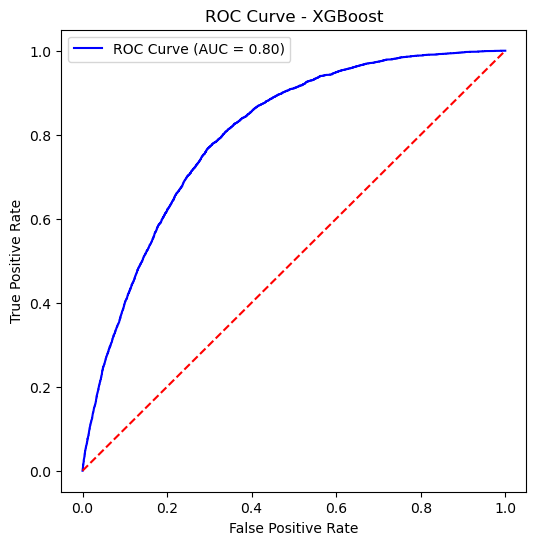

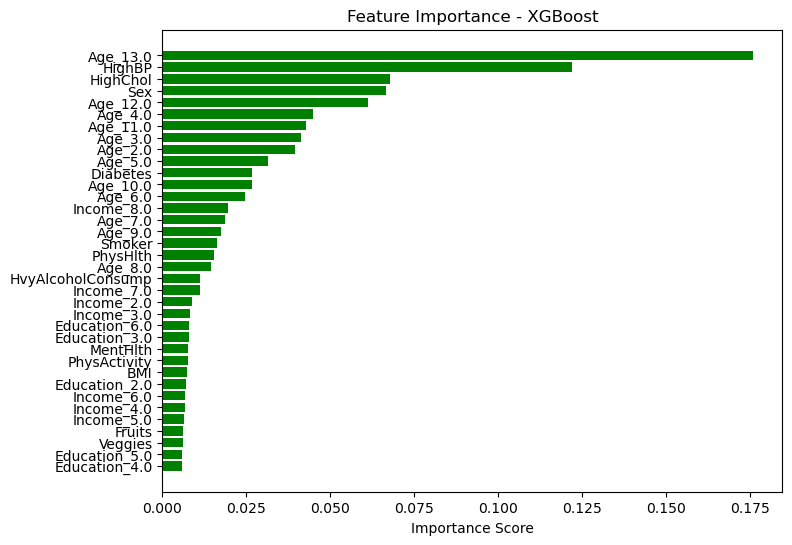

In [13]:
# Step 9: ROC Curve & Feature Importance

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ✅ 1. ROC Curve & AUC
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]  # probability for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

# ✅ 2. Feature Importance
import pandas as pd
importances = best_xgb.feature_importances_
features = X_train.columns
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='green')
plt.xlabel("Importance Score")
plt.title("Feature Importance - XGBoost")
plt.gca().invert_yaxis()
plt.show()


In [14]:
# Step 10: Wrap-up & Save Project

import joblib
import json

# ✅ 1. Save the best model
joblib.dump(best_xgb, "best_xgb_model.pkl")
print("✅ Model saved as best_xgb_model.pkl")

# ✅ 2. Save performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:,1]

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
}

with open("model_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("✅ Metrics saved in model_metrics.json")

# ✅ 3. Save top 10 feature importances
import pandas as pd

feat_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
top_features = feat_importances.sort_values(ascending=False).head(10)
top_features.to_csv("top_features.csv")

print("✅ Top features saved in top_features.csv")
print("\n🎯 Final Project Complete! You now have:")
print("1. Trained Model -> best_xgb_model.pkl")
print("2. Performance Metrics -> model_metrics.json")
print("3. Top Features -> top_features.csv")


✅ Model saved as best_xgb_model.pkl
✅ Metrics saved in model_metrics.json
✅ Top features saved in top_features.csv

🎯 Final Project Complete! You now have:
1. Trained Model -> best_xgb_model.pkl
2. Performance Metrics -> model_metrics.json
3. Top Features -> top_features.csv
